In [28]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [29]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="ssd_mobilenet.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


Input details: [{'name': 'normalized_input_image_tensor', 'index': 175, 'shape': array([  1, 300, 300,   3]), 'shape_signature': array([  1, 300, 300,   3]), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 128), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([128]), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'TFLite_Detection_PostProcess', 'index': 167, 'shape': array([ 1, 10,  4]), 'shape_signature': array([ 1, 10,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'TFLite_Detection_PostProcess:1', 'index': 168, 'shape': array([ 1, 10]), 'shape_signature': array([ 1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': a

In [8]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="depth_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)


Input details: [{'name': 'Const', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'shape_signature': array([  1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'midas_net_custom/sequential/re_lu_9/Relu', 'index': 335, 'shape': array([  1, 256, 256,   1]), 'shape_signature': array([  1, 256, 256,   1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [9]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="ssd_mobilenet.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_details_str = str(input_details)
output_details_str = str(output_details)

with open('model_details.txt', 'w') as file:
    file.write("Input details:\n")
    file.write(input_details_str)
    file.write("\n\nOutput details:\n")
    file.write(output_details_str)

print("Model details saved to model_details.txt")


Model details saved to model_details.txt


In [11]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="depth_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_details_str = str(input_details)
output_details_str = str(output_details)


with open('model_details_depth.txt', 'w') as file:
    file.write("Input details:\n")
    file.write(input_details_str)
    file.write("\n\nOutput details:\n")
    file.write(output_details_str)

print("Model details saved to model_details_depth.txt")


Model details saved to model_details_depth.txt


In [12]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


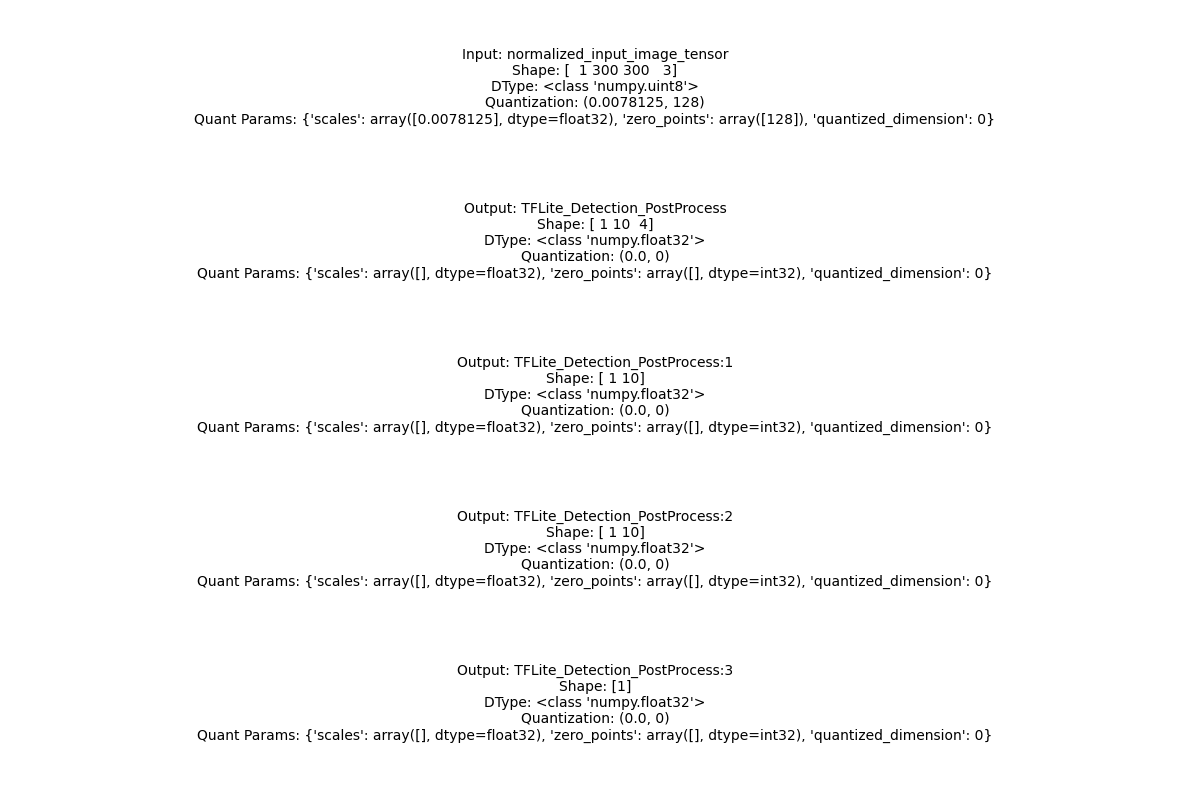

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_model_details(input_details, output_details):
    num_details = max(len(input_details), len(output_details))
    fig_height = max(6, num_details * 2)
    
    fig, ax = plt.subplots(figsize=(12, fig_height))
    y_pos = np.arange(len(input_details) + len(output_details))
    
    input_text = [f"Input: {d['name']}\nShape: {d['shape']}\nDType: {d['dtype']}\nQuantization: {d['quantization']}\nQuant Params: {d['quantization_parameters']}" for d in input_details]
    for i, text in enumerate(input_text):
        ax.text(0.5, len(y_pos) - i - 0.5, text, fontsize=10, ha='center', va='center')
    
    output_text = [f"Output: {d['name']}\nShape: {d['shape']}\nDType: {d['dtype']}\nQuantization: {d['quantization']}\nQuant Params: {d['quantization_parameters']}" for d in output_details]
    for i, text in enumerate(output_text, start=len(input_text)):
        ax.text(0.5, len(y_pos) - i - 0.5, text, fontsize=10, ha='center', va='center')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, len(y_pos))
    ax.axis('off') 

    plt.tight_layout()
    plt.show()
    
visualize_model_details(input_details, output_details)


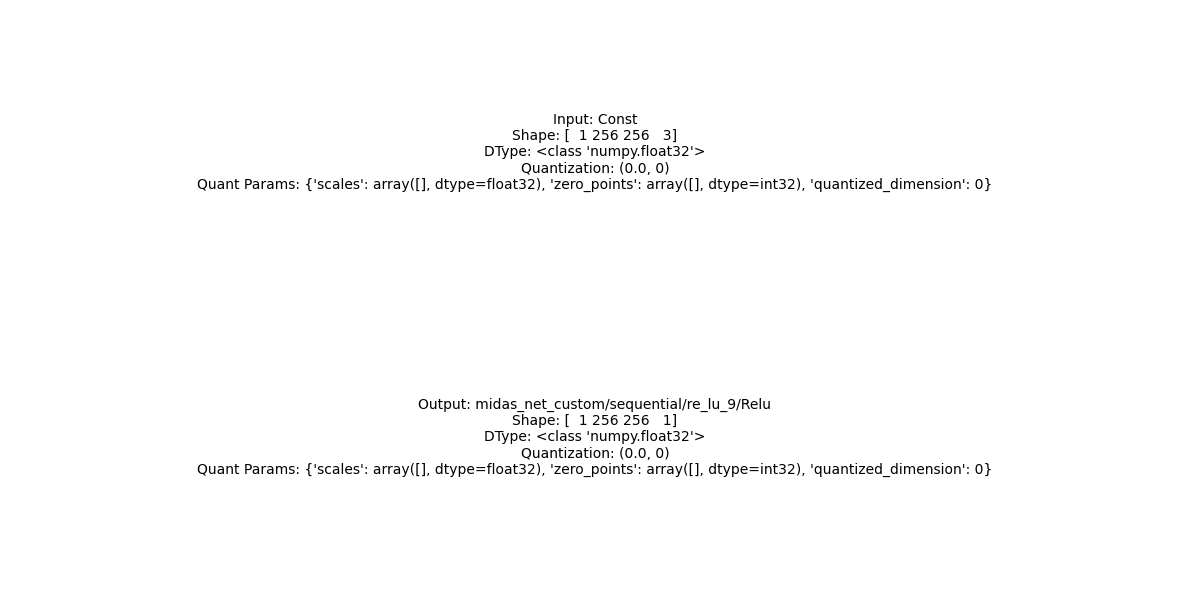

In [17]:
import matplotlib.pyplot as plt
import numpy as np

interpreter = tf.lite.Interpreter(model_path="depth_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def visualize_model_details(input_details, output_details):
    num_details = max(len(input_details), len(output_details))
    fig_height = max(6, num_details * 2)
    
    fig, ax = plt.subplots(figsize=(12, fig_height))
    y_pos = np.arange(len(input_details) + len(output_details))
    
    input_text = [f"Input: {d['name']}\nShape: {d['shape']}\nDType: {d['dtype']}\nQuantization: {d['quantization']}\nQuant Params: {d['quantization_parameters']}" for d in input_details]
    for i, text in enumerate(input_text):
        ax.text(0.5, len(y_pos) - i - 0.5, text, fontsize=10, ha='center', va='center')
    
    output_text = [f"Output: {d['name']}\nShape: {d['shape']}\nDType: {d['dtype']}\nQuantization: {d['quantization']}\nQuant Params: {d['quantization_parameters']}" for d in output_details]
    for i, text in enumerate(output_text, start=len(input_text)):
        ax.text(0.5, len(y_pos) - i - 0.5, text, fontsize=10, ha='center', va='center')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, len(y_pos))
    ax.axis('off') 

    plt.tight_layout()
    plt.show()
    
visualize_model_details(input_details, output_details)

In [23]:
!pip install netron

In [24]:
import netron
import os

model_path = 'ssd_mobilenet.tflite'

netron.start(model_path, browse=False) 
from IPython.display import IFrame

netron_url = 'http://localhost:8080/'
display(IFrame(netron_url, width=800, height=600))

Serving 'ssd_mobilenet.tflite' at http://localhost:8080


In [26]:
import netron
import os

model_path = 'depth_model.tflite'

netron.start(model_path, browse=False) 
from IPython.display import IFrame

netron_url = 'http://localhost:8080/'
display(IFrame(netron_url, width=800, height=600))

Serving 'depth_model.tflite' at http://localhost:8080
